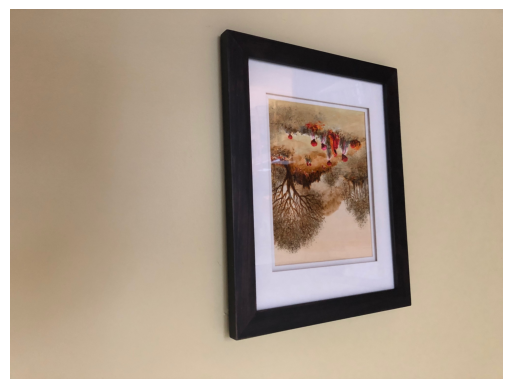

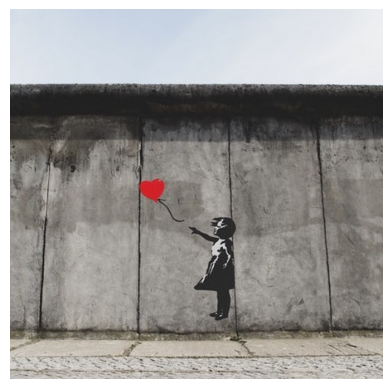

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image1 = mpimg.imread("HW1_image1.jpg")
image2 = mpimg.imread("HW1_image2.jpg")

# Display the image
plt.imshow(image1)
plt.axis("off")  # Hide axis
plt.show()

plt.imshow(image2)
plt.axis("off")  # Hide axis
plt.show()


## Custom Homography Fucntion Implementation:

In [49]:
import numpy as np

def compute_homography(src_pts, dst_pts):
    # Number of correspondences
    n = len(src_pts)

    # Build the system of equations Ah = b
    A = []
    b = []

    # Loop over each correspondence
    for i in range(n):
        # Source point (x, y)
        x = src_pts[i][0]
        y = src_pts[i][1]

        # Destination point (x', y')
        xp = dst_pts[i][0]
        yp = dst_pts[i][1]

        # Equation for x'
        A.append([x, y, 1, 0, 0, 0, -xp*x, -xp*y])
        b.append(xp)

        # Equation for y'
        A.append([0, 0, 0, x, y, 1, -yp*x, -yp*y])
        b.append(yp)

    # Convert to numpy arrays
    A = np.array(A)
    b = np.array(b)

    # Solve the system using least squares
    h, _, _, _ = np.linalg.lstsq(A, b, rcond=None)

    # Add h33 = 1
    h = np.append(h, 1)

    # Reshape into 3x3 matrix
    H = h.reshape(3, 3)

    return H


# Question 1 - 4 point homography

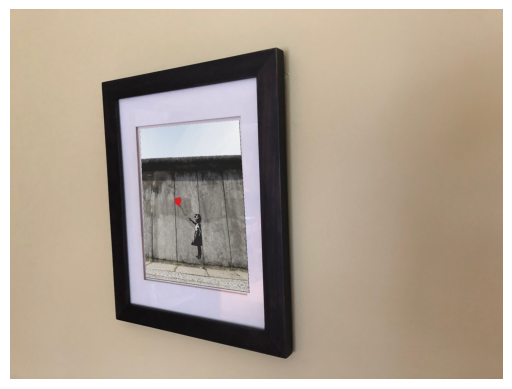

In [50]:
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image1_rgb = np.flip(image1)

# Define points in image1
pts_image1 = np.float32([[532, 492], [937, 455], [978, 1158], [557, 1097]])

# Define points in image2
h, w, _ = image2.shape
pts_image2 = np.float32([[0, 0], [w, 0], [w, h], [0, h]])

# Compute homography
H = compute_homography(pts_image2, pts_image1)

# Warp image2 into image1’s perspective
warped_img2 = cv2.warpPerspective(image2_rgb, H, (image1_rgb.shape[1], image1_rgb.shape[0]))

# Create mask for overlay
mask = np.zeros_like(image1_rgb, dtype=np.uint8)
cv2.fillConvexPoly(mask, np.int32(pts_image1), (255, 255, 255))

# Blend
image1_masked = cv2.bitwise_and(image1_rgb, 255 - mask)
final_result = cv2.add(image1_masked, warped_img2)

# Convert back to RGB for display
image1_rgb = cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB)

# Show result
plt.imshow(image1_rgb)
plt.axis("off")
plt.show()


# Question 2 - 8 point homography

## Sub-Question 1
Given what we learned about homographies and how they warp images can you pick four additional points from the two images. How would you modify the computation of the H matrix when you have an overconstrained problem (8 points as opposed to 4)?

## Answer
custom compute_homography function uses least square to find the H matrix. It uses np.linalg.lstsq(...) function to minimize the error in the equations A and b to compute matrix H.

see the following line in compute_homography() defined in Problem 1

h, _, _, _ = np.linalg.lstsq(A, b, rcond=None)

## Sub-Question 2
Recompute H with these 8 points and comment on the
differences in the H matrix. 

## Answer
In the code below 4 additional points are used to compute H matrix with total of 8 pairs of points. The H matrix did not change much, it is very similar to the previous H matrix.
extra 4 points are selected from the middle of the edges of the images using cursor. selected points are not exactly at the center of the edges, but they are fairly close, which helped produce a very similar H matrix.

See the code below and the image generated as a result of the 8 point homagraphy matrix.

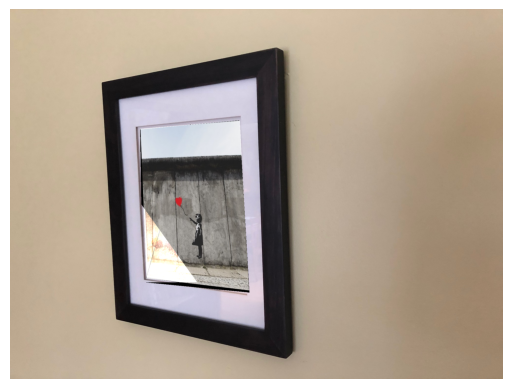

In [52]:

image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image1_rgb = np.flip(image1)  

#selected points                                                       #extra 4 points added below
pts_image1 = np.float32([[532,492],[937,455],[978,1158],[557,1097],    [737, 471],[946, 798],[766, 1117],[537, 798]])

h, w, _ = image2.shape                                                 #extra 4 points added below
pts_image2 = np.float32([[0,0], [w,0], [w,h], [0,h],                   [w/2,0], [w,h/2], [w/2,h], [0,h/2]])

#Compute homography
H = compute_homography(pts_image2, pts_image1)

#Warp image2 into image1’s perspective
warped_img2 = cv2.warpPerspective(image2_rgb, H, (image1_rgb.shape[1], image1_rgb.shape[0]))

#Create mask for overlay
mask = np.zeros_like(image1_rgb, dtype=np.uint8)
cv2.fillConvexPoly(mask, np.int32(pts_image1), (255,255,255))

#Blend
image1_masked = cv2.bitwise_and(image1_rgb, 255-mask)
final_result = cv2.add(image1_masked, warped_img2)

#Red channel correction
image1_rgb = cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB)

plt.imshow(image1_rgb)
plt.axis("off")
plt.show()


## Sub-question 3:
Map another image (of your own – please keep it PG-13) on image1 with this new
homography.

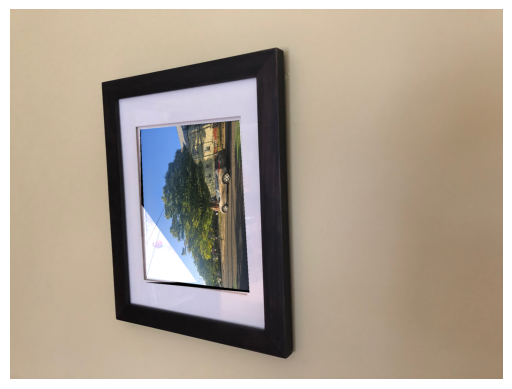

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image1 = mpimg.imread("HW1_image1.jpg")
image2 = mpimg.imread("photos/center.jpg")

image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image1_rgb = np.flip(image1)  

#selected points                                                       #extra 4 points added below
pts_image1 = np.float32([[532,492],[937,455],[978,1158],[557,1097],    [737, 471],[946, 798],[766, 1117],[537, 798]])

h, w, _ = image2.shape                                                 #extra 4 points added below
pts_image2 = np.float32([[0,0], [w,0], [w,h], [0,h],                   [w/2,0], [w,h/2], [w/2,h], [0,h/2]])

#Compute homography
H = compute_homography(pts_image2, pts_image1)

#Warp image2 into image1’s perspective
warped_img2 = cv2.warpPerspective(image2_rgb, H, (image1_rgb.shape[1], image1_rgb.shape[0]))

#Create mask for overlay
mask = np.zeros_like(image1_rgb, dtype=np.uint8)
cv2.fillConvexPoly(mask, np.int32(pts_image1), (255,255,255))

#Blend
image1_masked = cv2.bitwise_and(image1_rgb, 255-mask)
final_result = cv2.add(image1_masked, warped_img2)

#Red channel correction
image1_rgb = cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB)

plt.imshow(image1_rgb)
plt.axis("off")
plt.show()


# Question 3 - Multiple image blend using homography

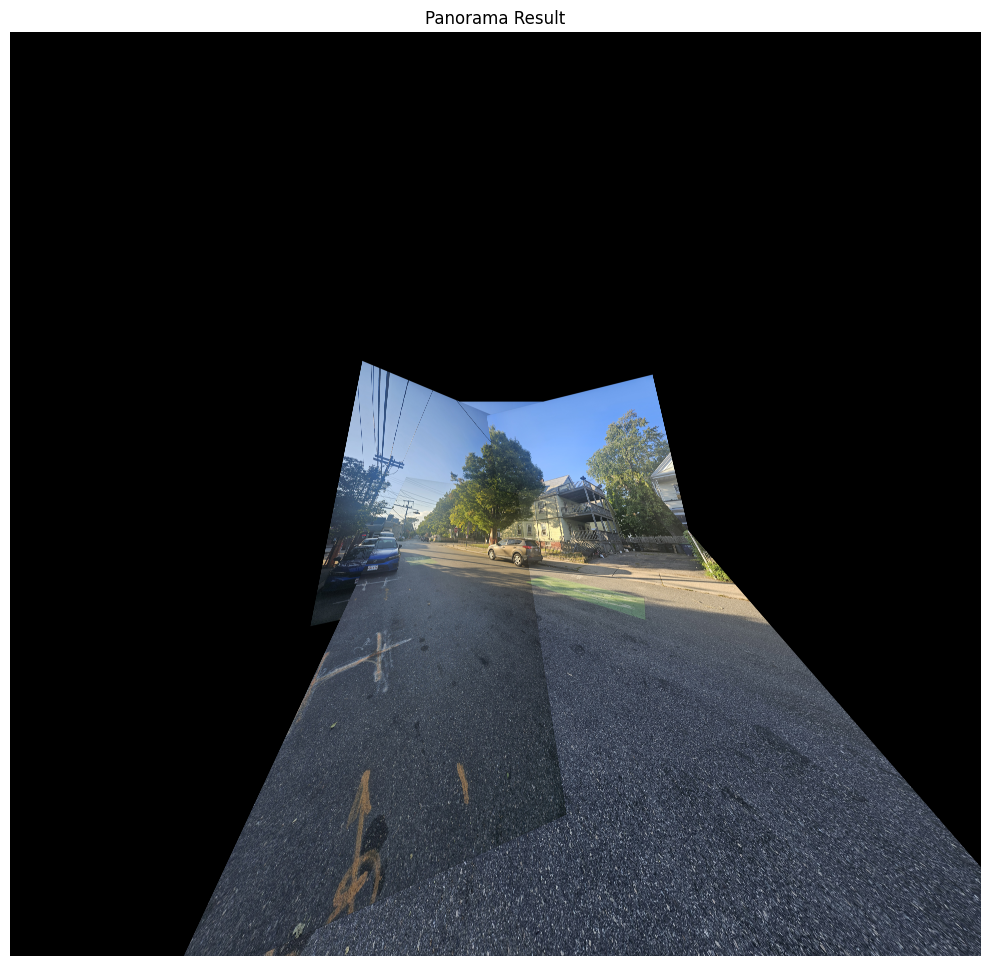

In [53]:
import cv2
import numpy as np
import json
import os
import matplotlib.pyplot as plt

def load_points(json_path):
    # Load matching points from a JSON file
    with open(json_path, "r") as f:
        data = json.load(f)
    pts_center = np.array(data["points_center"], np.float32)
    pts_other = np.array(data["points_other"], np.float32)
    return pts_center, pts_other


def stitch_images(center_img, image_paths, json_folder="results"):
    # Get size of the center image
    h, w = center_img.shape[:2]

    # Create a large empty canvas for the panorama
    canvas_h, canvas_w = h * 5, w * 7
    canvas = np.zeros((canvas_h, canvas_w, 3), np.uint8)

    # Place the center image in the middle
    offset_x = canvas_w // 2 - w // 2
    offset_y = canvas_h // 2 - h // 2
    canvas[offset_y:offset_y+h, offset_x:offset_x+w] = center_img

    # Process each image
    for img_path in image_paths:
        img = cv2.imread(img_path)

        # Build JSON file path
        name = os.path.splitext(os.path.basename(img_path))[0]
        json_path = os.path.join(json_folder, f"pairs_{name}.json")

        # Load correspondence points
        pts_center, pts_other = load_points(json_path)

        # Adjust center points with offset
        pts_center_offset = pts_center + np.array([offset_x, offset_y])

        # Compute homography
        H, _ = cv2.findHomography(pts_other, pts_center_offset)

        # Warp the image
        warped = cv2.warpPerspective(img, H, (canvas_w, canvas_h))

        # Copy non-black pixels into the canvas
        mask = warped > 0
        canvas[mask] = warped[mask]

    return canvas


def main():
    # Path to the center image
    center_path = "photos/center.jpg"

    # Paths to other images
    other_paths = [
        "photos/img1.jpg",
        "photos/img3.jpg",
        "photos/img4.jpg",
        "photos/img5.jpg",
        "photos/img6.jpg"
    ]

    # Load the center image
    center_img = cv2.imread(center_path)

    # Perform stitching
    panorama = stitch_images(center_img, other_paths, "results")

    # Show the final panorama in a bigger window
    plt.figure(figsize=(20, 12))
    plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
    plt.title("Panorama Result")
    plt.axis("off")
    plt.show()

    # Save the panorama
    os.makedirs("results", exist_ok=True)
    out_path = "results/final_panorama.jpg"
    cv2.imwrite(out_path, panorama)


if __name__ == "__main__":
    main()


# Notes about Q3

following images are saved in results folder.
findPoints.py script is created and used to interactibely select point pairs from all the image using cursor and automatically record them in results folder in json format.

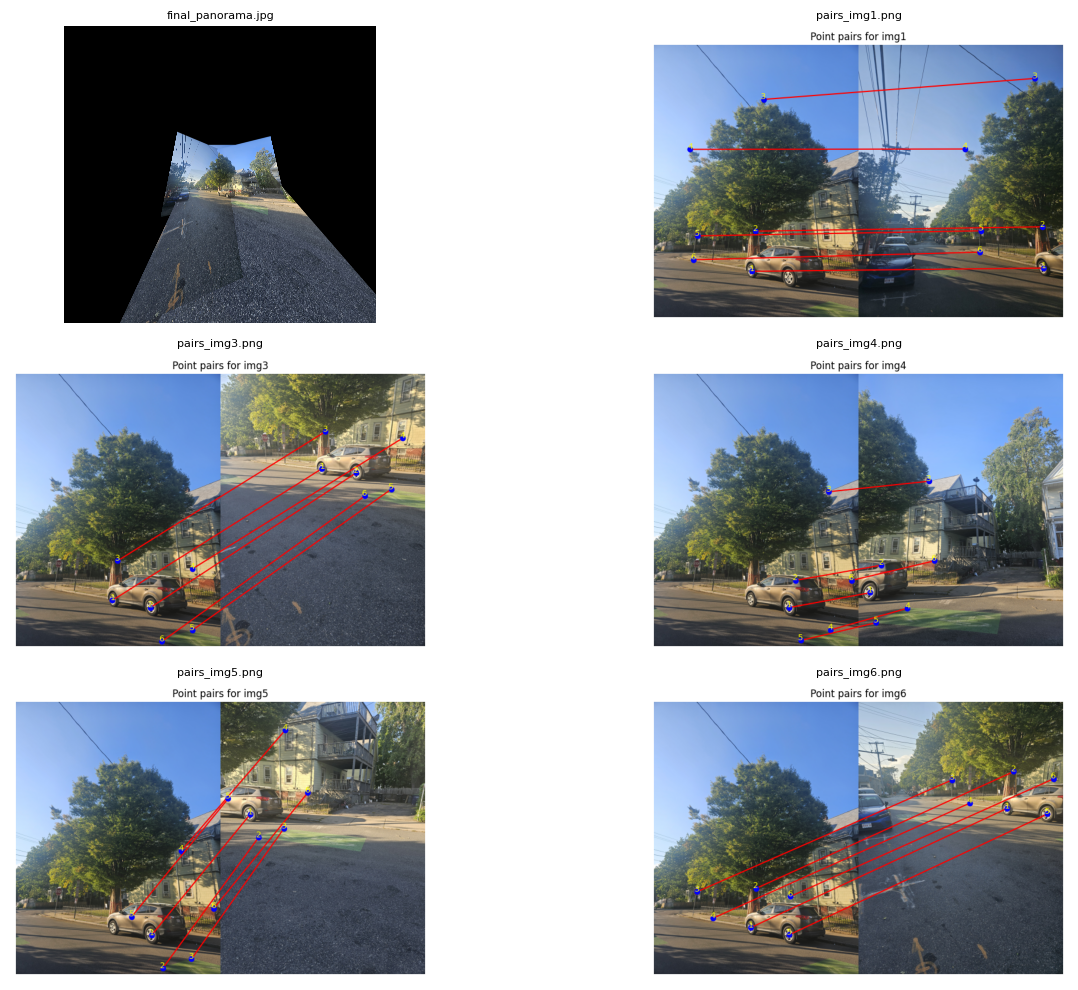

In [54]:
import os
import cv2
import matplotlib.pyplot as plt

def show_images_from_folder(folder="results"):
    # Get all image files in the folder
    image_files = [f for f in os.listdir(folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]

    # Sort for consistent ordering
    image_files.sort()

    # Load images
    images = []
    for file in image_files:
        path = os.path.join(folder, file)
        img = cv2.imread(path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append((file, img))

    # Determine grid size (square-ish layout)
    n = len(images)
    cols = int(n**0.5)
    rows = (n + cols - 1) // cols

    # Plot grid
    plt.figure(figsize=(15, 10))
    for i, (name, img) in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(name, fontsize=8)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    show_images_from_folder("results")
